# Выпуская квалификационная работа Егора Проскурина

## Тема: Прогнозирование конечных свойств новых материалов (композиционных материалов). 



# Выпуская квалификационная работа Егора Проскурина

## Тема: Прогнозирование конечных свойств новых материалов (композиционных материалов). 

In [327]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, LeaveOneOut, train_test_split
from sklearn.preprocessing import StandardScaler


Считываем исходные данные, и проверяем их размерность

In [328]:
bp = pd.read_excel('/home/jorik/dev/data/vkr/X_bp.xlsx', index_col=[0])
bp.shape

(1023, 10)

In [329]:
nup = pd.read_excel('/home/jorik/dev/data/vkr/X_nup.xlsx', index_col=[0])
nup.shape

(1040, 3)

In [330]:
# Объединяем считанные данные в один датасет по индексам, используя inner join
df = pd.concat([bp, nup], axis=1, join='inner')
df.shape

(1023, 13)

Первичный анализ данных

In [331]:
# посмотрим содержимое датасета
df.sample(5).T

192          823          462  \
Соотношение матрица-наполнитель          1.441478     2.878374     2.538562   
Плотность, кг/м3                      1984.144357  1977.126504  2055.003531   
модуль упругости, ГПа                 1086.492724   753.240254   765.121953   
Количество отвердителя, м.%            107.938101   118.753779    99.556766   
Содержание эпоксидных групп,%_2         21.292586    21.460817    18.968148   
Температура вспышки, С_2               299.924620   319.249878   371.425994   
Поверхностная плотность, г/м2          533.792221   558.711629   493.405155   
Модуль упругости при растяжении, ГПа    74.566476    68.005772    71.934726   
Прочность при растяжении, МПа         2409.335270  2294.262913  3308.335813   
Потребление смолы, г/м2                255.593733   248.344638   216.122062   
Угол нашивки, град                       0.000000    90.000000     0.000000   
Шаг нашивки                              8.147416     5.416865     4.112366   
Плотность нашивки                       38.151972    45.708480    69.024734   

                                              630          503  
Соотношение матрица-наполнитель          1.584151     1.367585  
Плотность, кг/м3                      2005.350824  2088.013591  
модуль упругости, ГПа                 1057.768509   923.421474  
Количество отвердителя, м.%            147.194913   192.705385  
Содержание эпоксидных групп,%_2         22.126621    23.119301  
Температура вспышки, С_2               273.122132   251.997689  
Поверхностная плотность, г/м2           98.620347    59.939393  
Модуль упругости при растяжении, ГПа    73.550230    77.627654  
Прочность при растяжении, МПа         3015.926352  2149.657181  
Потребление смолы, г/м2                128.357543    33.803026  
Угол нашивки, град                      90.000000     0.000000  
Шаг нашивки                              7.258048     8.815040  
Плотность нашивки                       52.516105    52.134210

In [332]:
df.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1023.000000              1023.000000   
mean                     2466.922843               218.423144   
std                       485.628006                59.735931   
min                      1036.856605                33.803026   
25%                      2135.850448               179.627520   
50%                      2459.524526               219.198882   
75%                      2767.193119               257.481724   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1023.000000  1023.000000        1023.000000  
mean            44.252199     6.899222          57.153929  
std             45.015793     2.563467          12.350969  
min              0.000000     0.000000           0.000000  
25%              0.000000     5.080033          49.799212  
50%              0.000000     6.916144          57.341920  
75%             90.000000     8.586293          64.944961  
max             90.000000    14.440522         103.988901

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [334]:
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [335]:
df['Угол нашивки, град'] .unique()

array([ 0, 90])

Видим отсутствие пропусков. Большинство признаков (кроме угла нашивки) имеют большое число уникальных значений. 
Оценим степень линейной зависимости целевых признаков от остальных:

In [336]:
df.corr()['модуль упругости, ГПа'].sort_values()

Угол нашивки, град                     -0.025417
Шаг нашивки                            -0.009875
Плотность, кг/м3                       -0.009647
Содержание эпоксидных групп,%_2        -0.006804
Поверхностная плотность, г/м2          -0.005306
Потребление смолы, г/м2                 0.001840
Модуль упругости при растяжении, ГПа    0.023267
Количество отвердителя, м.%             0.024049
Температура вспышки, С_2                0.031174
Соотношение матрица-наполнитель         0.031700
Прочность при растяжении, МПа           0.041868
Плотность нашивки                       0.056346
модуль упругости, ГПа                   1.000000
Name: модуль упругости, ГПа, dtype: float64

In [337]:
df.corr()['Прочность при растяжении, МПа'].sort_values()

Количество отвердителя, м.%            -0.075375
Плотность, кг/м3                       -0.069981
Шаг нашивки                            -0.059547
Температура вспышки, С_2               -0.031763
Содержание эпоксидных групп,%_2        -0.023899
Модуль упругости при растяжении, ГПа   -0.009009
Поверхностная плотность, г/м2          -0.003210
Плотность нашивки                       0.019604
Угол нашивки, град                      0.023398
Соотношение матрица-наполнитель         0.024148
Потребление смолы, г/м2                 0.028602
модуль упругости, ГПа                   0.041868
Прочность при растяжении, МПа           1.000000
Name: Прочность при растяжении, МПа, dtype: float64

Не обнаруживаем значимых линейных корреляций признаков c целевыми.
Визуализируем датасет с помощью парной диаграммы. 

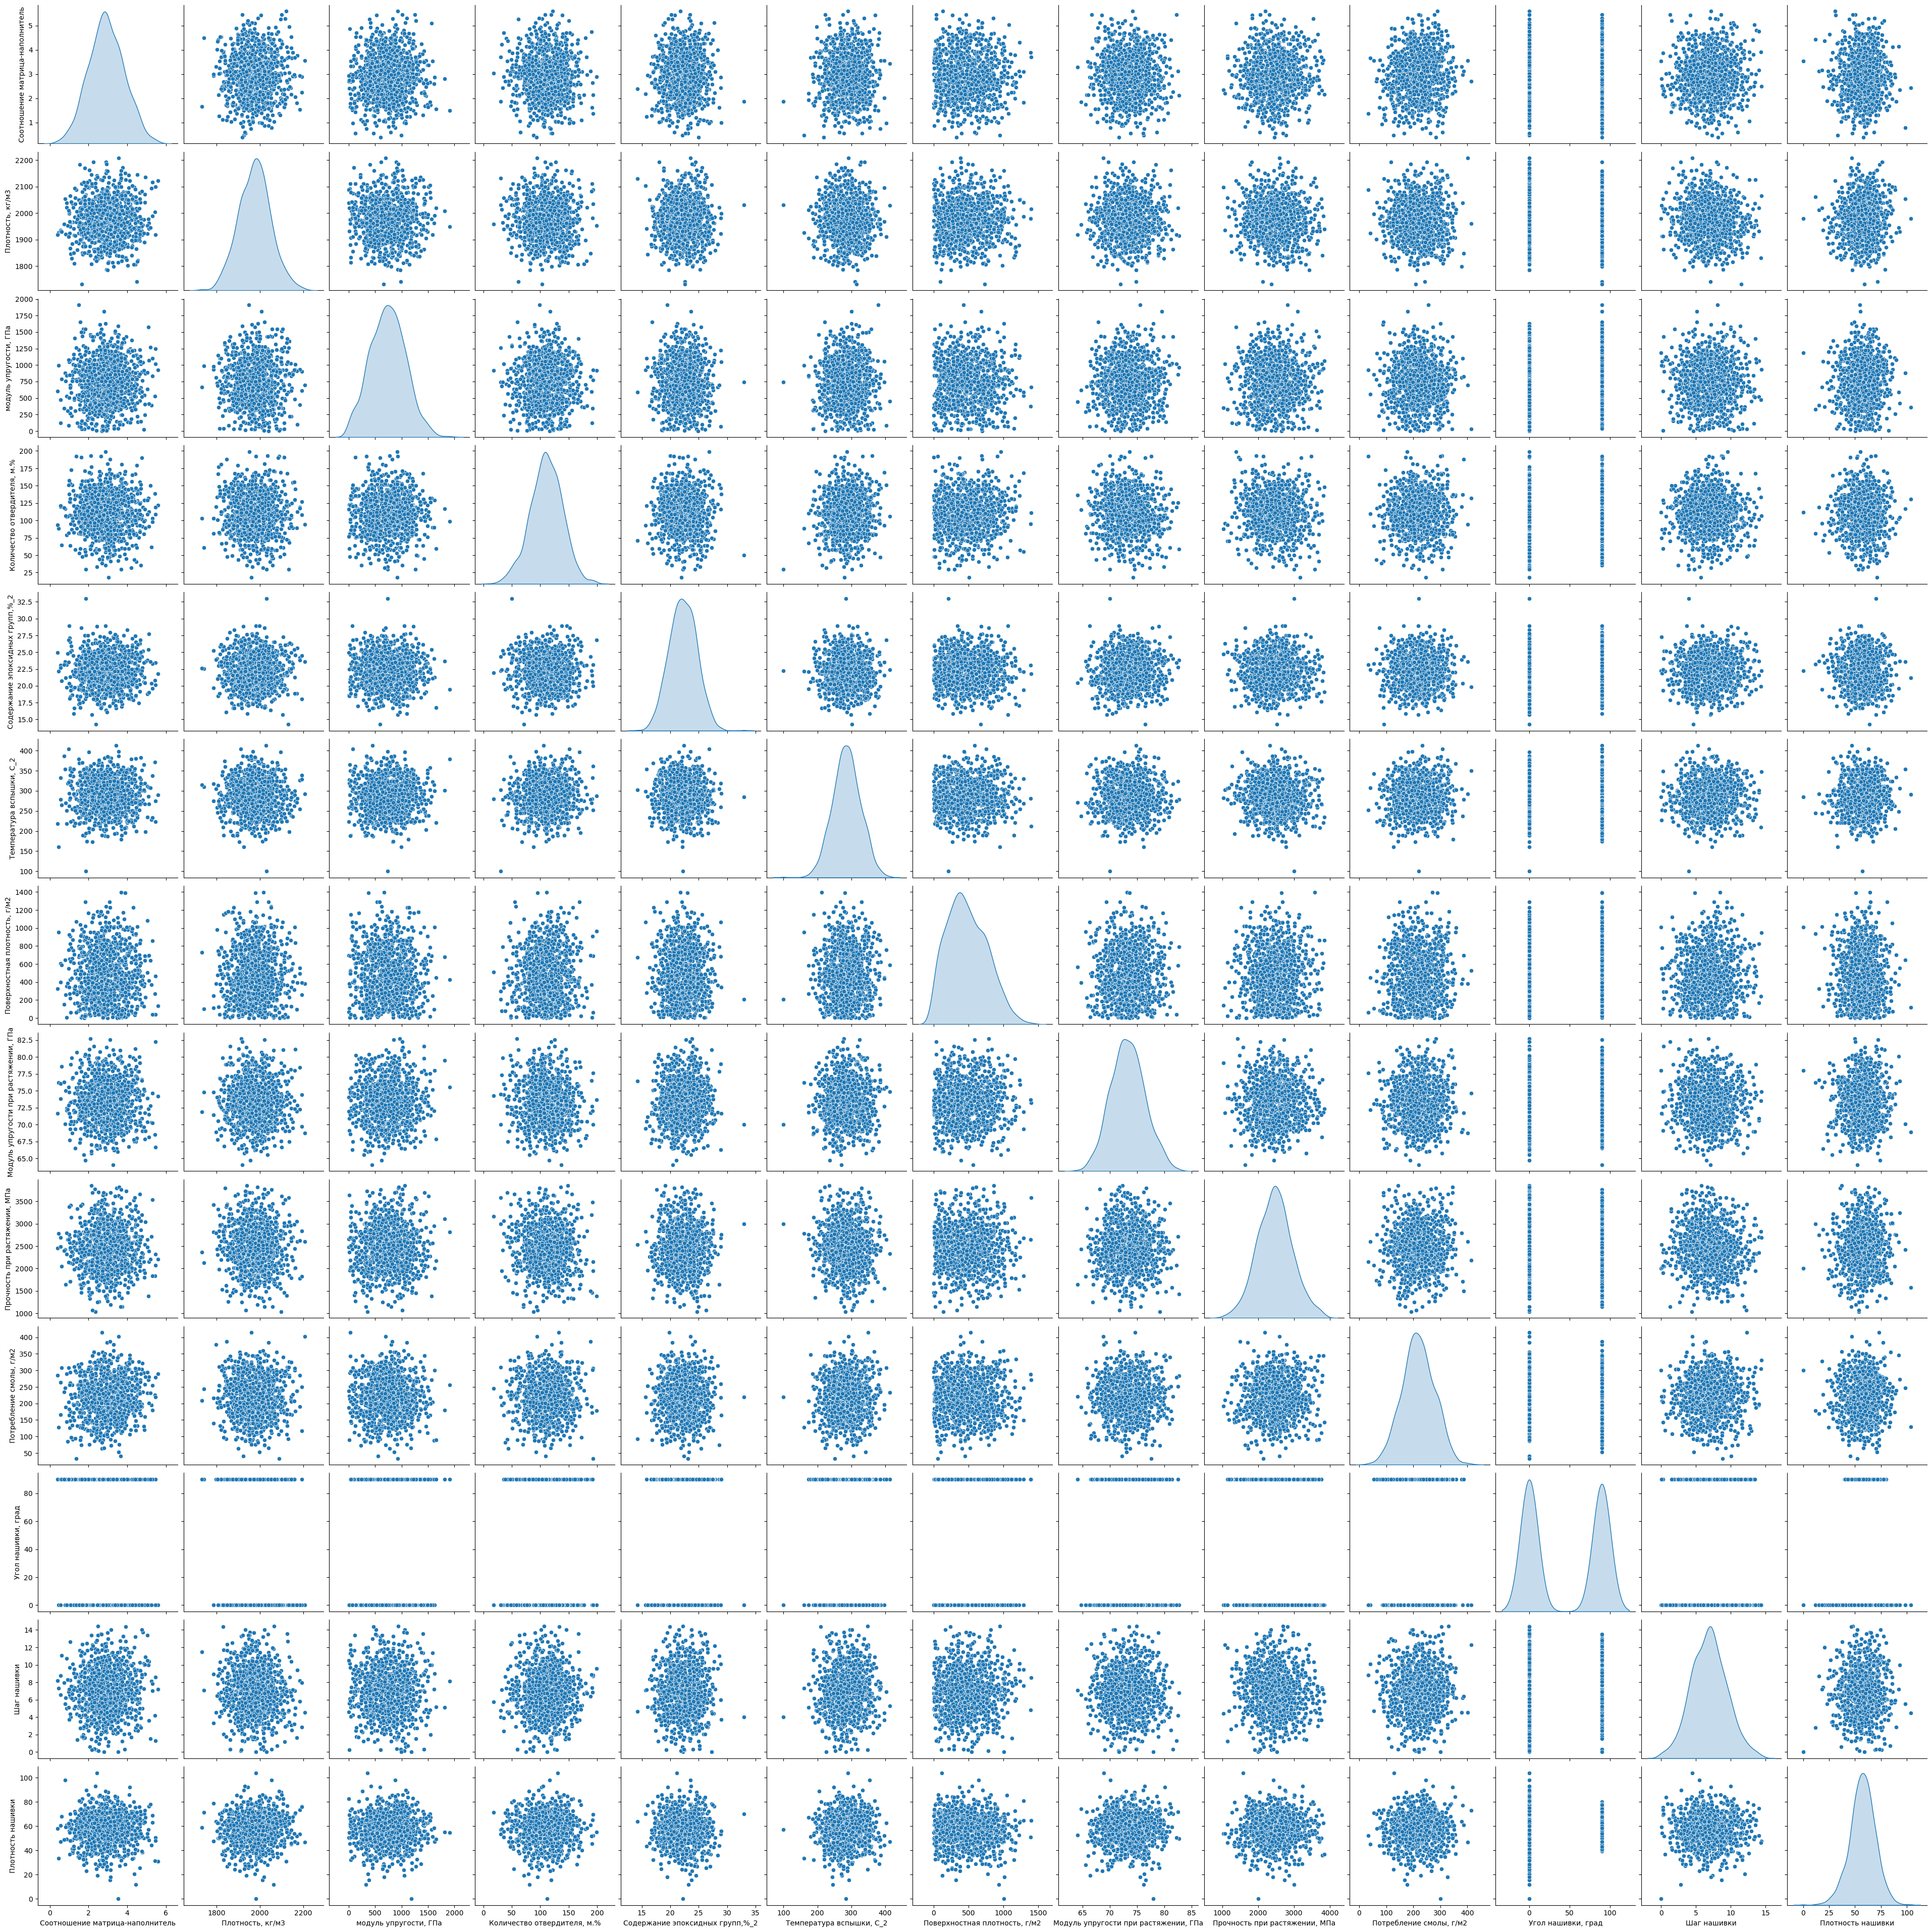

In [338]:
sns.pairplot(data=df, height=3, diag_kind='kde')

Визуальный анализ диаграммы свидетельствует об отсутствии статистически значимых корреляций признаков. Распределения как отдельных признаков, так и парных корреляций признаков имеют высокую степень сходства с нормальным распределением. 



Препроцессинг данных.

In [339]:
'''
y_elasticy = df['модуль упругости, ГПа']
y_strength = df['Прочность при растяжении, МПа']
df.drop(['модуль упругости, ГПа', 'Прочность при растяжении, МПа'], axis=1, inplace=True)
'''

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(data=scaled_data, columns=df.columns)

scaled_df.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                     1.023000e+03      1.023000e+03   
mean                     -4.102290e-17      8.510625e-16   
std                       1.000489e+00      1.000489e+00   
min                      -2.783776e+00     -3.310622e+00   
25%                      -6.710072e-01     -6.999212e-01   
50%                      -2.573263e-02      2.560303e-02   
75%                       6.817601e-01      6.193176e-01   
max                       2.915695e+00      3.148712e+00   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count           1.023000e+03                 1.023000e+03   
mean            3.777797e-16                -5.013910e-17   
std             1.000489e+00                 1.000489e+00   
min            -2.234332e+00                -3.282308e+00   
25%            -7.267418e-01                -6.409455e-01   
50%            -7.843941e-04                -2.096293e-04   
75%             6.722489e-01                 6.774466e-01   
max             3.549589e+00                 3.125033e+00   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                     1.023000e+03              1.023000e+03   
mean                     -3.429428e-17              4.692673e-16   
std                       1.000489e+00              1.000489e+00   
min                      -3.321825e+00             -4.542215e+00   
25%                      -6.803619e-01             -6.552663e-01   
50%                      -5.673631e-03              3.582556e-04   
75%                       7.141185e-01              6.627029e-01   
max                       4.471955e+00              3.112932e+00   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                   1.023000e+03                          1.023000e+03   
mean                    6.565835e-17                         -9.653405e-17   
std                     1.000489e+00                          1.000489e+00   
min                    -1.714677e+00                         -2.975023e+00   
25%                    -7.678973e-01                         -6.683499e-01   
50%                    -1.097794e-01                         -1.917160e-02   
75%                     7.486141e-01                          6.505431e-01   
max                     3.260615e+00                          3.000355e+00   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                   1.023000e+03             1.023000e+03   
mean                    7.937606e-16            -2.799976e-16   
std                     1.000489e+00             1.000489e+00   
min                    -2.946217e+00            -3.092116e+00   
25%                    -6.820742e-01            -6.497697e-01   
50%                    -1.524199e-02             1.299248e-02   
75%                     6.186158e-01             6.541739e-01   
max                     2.846190e+00             3.285517e+00   

       Угол нашивки, град   Шаг нашивки  Плотность нашивки  
count        1.023000e+03  1.023000e+03       1.023000e+03  
mean        -2.757434e-15 -2.967649e-16       4.688332e-17  
std          1.000489e+00  1.000489e+00       1.000489e+00  
min         -9.835180e-01 -2.692680e+00      -4.629749e+00  
25%         -9.835180e-01 -7.100068e-01      -5.957682e-01  
50%         -9.835180e-01  6.604358e-03       1.522815e-02  
75%          1.016758e+00  6.584426e-01       6.311118e-01  
max          1.016758e+00  2.943275e+00       3.793863e+00

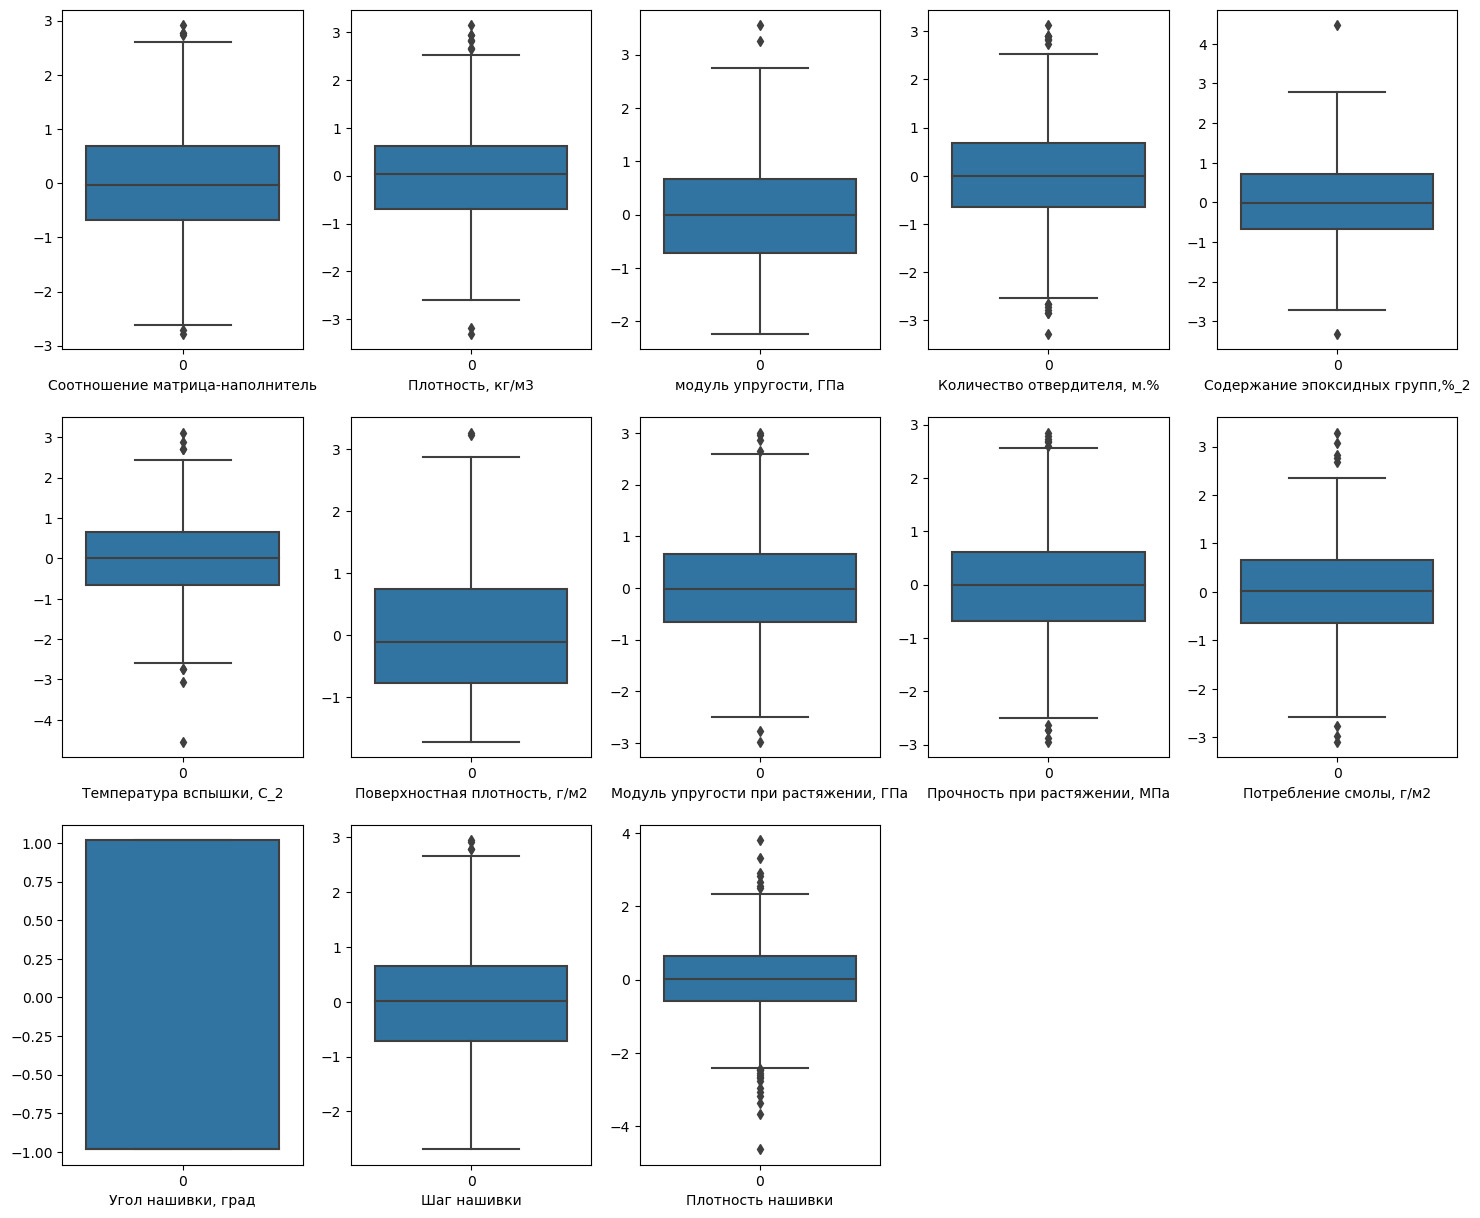

In [340]:
# построим боксплот нормализованных признаков
fig = plt.figure(figsize=(18,15))

for number, column in enumerate(scaled_df.columns):
    plt.subplot(3, 5, number+1)
    plt.xlabel(column)
    sns.boxplot(data=scaled_df[column])

Поскольку размер выборки небольшой, а выбросы могут быть и частью распределения, то от удаления выбросов решено отказаться. 

Разделяем данные

In [341]:
y_elasticy = scaled_df['модуль упругости, ГПа']
y_strength = scaled_df['Прочность при растяжении, МПа']

scaled_df.drop(['модуль упругости, ГПа', 'Прочность при растяжении, МПа'], axis=1, inplace=True)

X_elasticy_train, X_elasticy_test, y_elasticy_train, y_elasticy_test = train_test_split(scaled_df, y_elasticy, test_size=0.2, random_state=42)
X_strength_train, X_strength_test, y_strength_train, y_strength_test = train_test_split(scaled_df, y_strength, test_size=0.2, random_state=42)



Модель случайного леса

In [344]:

# модуль упругости
regressor_elasticy = RandomForestRegressor()
regressor_elasticy.fit(X_elasticy_train, y_elasticy_train)

r2_score(y_elasticy_test, random_forest_regressor.predict(X_elasticy_test))
# cross_val_score(regressor_elasticy, X_elasticy_test, y_elasticy_test, cv=5).mean()



-0.08694900865182387